In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Load the dataset
df = pd.read_csv('StudentsPerformance.csv')

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
# Checking for missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [11]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


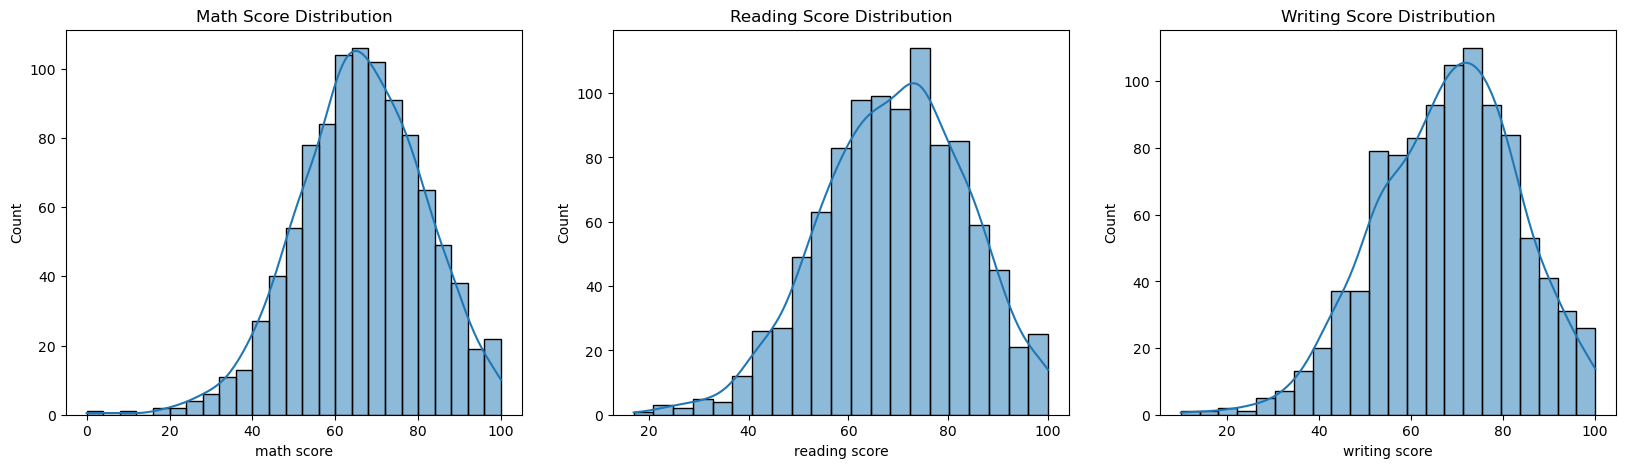

In [13]:
# Distribution of scores
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)# One row three columns and index one
sns.histplot(df['math score'], kde=True)
plt.title('Math Score Distribution')
plt.subplot(1, 3, 2) # One row three columns and index two
sns.histplot(df['reading score'], kde=True)
plt.title('Reading Score Distribution')
plt.subplot(1, 3, 3) # One row three columns and index three
sns.histplot(df['writing score'], kde=True)
plt.title('Writing Score Distribution')
plt.show()

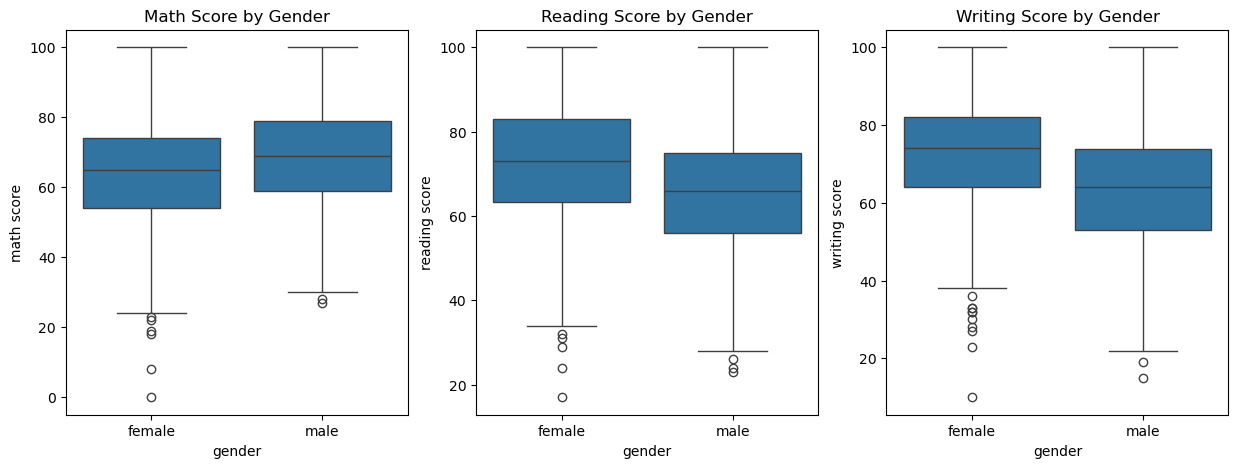

In [15]:
# Box plots for scores by gender
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='gender', y='math score', data=df)
plt.title('Math Score by Gender')
plt.subplot(1, 3, 2)
sns.boxplot(x='gender', y='reading score', data=df)
plt.title('Reading Score by Gender')
plt.subplot(1, 3, 3)
sns.boxplot(x='gender', y='writing score', data=df)
plt.title('Writing Score by Gender')
plt.show()

In [26]:
# Prepare data for the model
X = df[['math score', 'reading score']]
y = df['writing score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # training: 70% and test: 30%

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 21.65
R-squared: 0.92


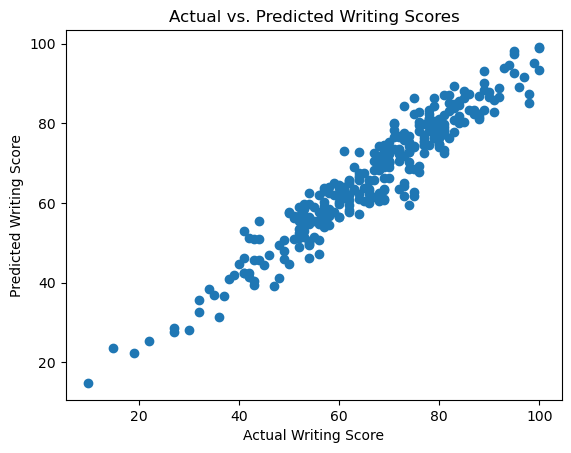

In [28]:
# Visulazing on a scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Writing Score')
plt.ylabel('Predicted Writing Score')
plt.title('Actual vs. Predicted Writing Scores')
plt.show()
